In [1]:
print("Hello, Dark Web Project")


Hello, Dark Web Project


In [3]:
pip install pandas

  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.0-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl (11.3 MB)
Using cached numpy-2.4.0-cp311-cp311-win_amd64.whl (12.6 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

df = pd.read_csv("../dataset/Agora.csv")
df.head()


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 243633-243634: invalid continuation byte

In [5]:
import pandas as pd

df = pd.read_csv("../dataset/Agora.csv", encoding="latin1")
df.head()


,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN


In [6]:
df.shape
df.columns


Index(['Vendor', ' Category', ' Item', ' Item Description', ' Price',
       ' Origin', ' Destination', ' Rating', ' Remarks'],
      dtype='object')

In [7]:
# select only item description and drop empty rows
text_df = df[[' Item Description']].dropna()
text_df.head()


,Item Description
0,12-Month HuluPlus Codes for $25. They are wort...
1,Hi we offer a World Wide CCcam Service for En...
2,Tagged Submission Fix Bebo Submission Fix Adju...
3,How to setup a VPN > TOR > SOCK super safe enc...
4,. This guide will teach you how to hack Faceb...


In [8]:
text_df = text_df.rename(columns={' Item Description': 'text'})
text_df.head()


,text
0,12-Month HuluPlus Codes for $25. They are wort...
1,Hi we offer a World Wide CCcam Service for En...
2,Tagged Submission Fix Bebo Submission Fix Adju...
3,How to setup a VPN > TOR > SOCK super safe enc...
4,. This guide will teach you how to hack Faceb...


In [9]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      # remove links
    text = re.sub(r"\d+", "", text)          # remove numbers
    text = re.sub(r"[^a-z\s]", "", text)     # remove symbols
    text = re.sub(r"\s+", " ", text)         # remove extra spaces
    return text

text_df['clean_text'] = text_df['text'].apply(clean_text)
text_df.head()


,text,clean_text
0,12-Month HuluPlus Codes for $25. They are wort...,month huluplus codes for they are worth they w...
1,Hi we offer a World Wide CCcam Service for En...,hi we offer a world wide cccam service for eni...
2,Tagged Submission Fix Bebo Submission Fix Adju...,tagged submission fix bebo submission fix adju...
3,How to setup a VPN > TOR > SOCK super safe enc...,how to setup a vpn tor sock super safe encrypt...
4,. This guide will teach you how to hack Faceb...,this guide will teach you how to hack faceboo...


In [11]:
pip install nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached regex-2025.11.3-cp311-cp311-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached regex-2025.11.3-cp311-cp311-win_amd64.whl (277 kB)
Using cached click-8.3.1-py3-none-any.whl (108 kB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)

text_df['clean_text'] = text_df['clean_text'].apply(remove_stopwords)
text_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sofia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,text,clean_text
0,12-Month HuluPlus Codes for $25. They are wort...,month huluplus codes worth sent within day wit...
1,Hi we offer a World Wide CCcam Service for En...,hi offer world wide cccam service enigma devic...
2,Tagged Submission Fix Bebo Submission Fix Adju...,tagged submission fix bebo submission fix adju...
3,How to setup a VPN > TOR > SOCK super safe enc...,setup vpn tor sock super safe encrypted connec...
4,. This guide will teach you how to hack Faceb...,guide teach hack facebook accounts exfriendsfo...


In [13]:
from collections import Counter

all_words = " ".join(text_df['clean_text']).split()
word_freq = Counter(all_words)

word_freq.most_common(15)


[('mg', 23369),
 ('quality', 19221),
 ('listing', 16227),
 ('g', 14387),
 ('high', 12800),
 ('please', 12692),
 ('shipping', 12494),
 ('mdma', 11307),
 ('order', 11039),
 ('x', 9948),
 ('product', 9281),
 ('fe', 9074),
 ('pure', 8887),
 ('read', 8875),
 ('profile', 8711)]

In [14]:
text_df[['clean_text']].to_csv("../dataset/cleaned_agora_text.csv", index=False)


In [15]:
import pandas as pd

df = pd.read_csv("../dataset/cleaned_agora_text.csv")
df.head()


,clean_text
0,month huluplus codes worth sent within day wit...
1,hi offer world wide cccam service enigma devic...
2,tagged submission fix bebo submission fix adju...
3,setup vpn tor sock super safe encrypted connec...
4,guide teach hack facebook accounts exfriendsfo...


In [20]:
pip install scikit-learn

  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl (38.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_df=0.9,     # ignore very common words
    min_df=10,      # ignore very rare words
    stop_words='english'
)

tfidf_matrix = tfidf.fit_transform(df['clean_text'])

tfidf_matrix.shape


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [22]:
df.isnull().sum()


clean_text    302
dtype: int64

In [23]:
# remove NaN values
df = df.dropna(subset=['clean_text'])

# remove empty or very short texts
df = df[df['clean_text'].str.strip().astype(bool)]

df.shape


(109360, 1)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=5,          # lowered from 10 (safer)
    stop_words='english'
)

tfidf_matrix = tfidf.fit_transform(df['clean_text'])
tfidf_matrix.shape


(109360, 16485)

In [25]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=5,      # number of topics
    random_state=42
)

lda.fit(tfidf_matrix)


,"n_components n_components: int, default=10Number of topics... versionchanged:: 0.19 ``n_topics`` was renamed to ``n_components``",5
,"doc_topic_prior doc_topic_prior: float, default=NonePrior of document topic distribution `theta`. If the value is None,defaults to `1 / n_components`.In [1]_, this is called `alpha`.",None
,"topic_word_prior topic_word_prior: float, default=NonePrior of topic word distribution `beta`. If the value is None, defaultsto `1 / n_components`.In [1]_, this is called `eta`.",None
,"learning_method learning_method: {'batch', 'online'}, default='batch'Method used to update `_component`. Only used in :meth:`fit` method.In general, if the data size is large, the online update will be muchfaster than the batch update.Valid options:- 'batch': Batch variational Bayes method. Use all training data in each EM update. Old `components_` will be overwritten in each iteration.- 'online': Online variational Bayes method. In each EM update, use mini-batch of training data to update the ``components_`` variable incrementally. The learning rate is controlled by the ``learning_decay`` and the ``learning_offset`` parameters... versionchanged:: 0.20 The default learning method is now ``""batch""``.",'batch'
,"learning_decay learning_decay: float, default=0.7It is a parameter that control learning rate in the online learningmethod. The value should be set between (0.5, 1.0] to guaranteeasymptotic convergence. When the value is 0.0 and batch_size is``n_samples``, the update method is same as batch learning. In theliterature, this is called kappa.",0.7
,"learning_offset learning_offset: float, default=10.0A (positive) parameter that downweights early iterations in onlinelearning. It should be greater than 1.0. In the literature, this iscalled tau_0.",10.0
,"max_iter max_iter: int, default=10The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the :meth:`fit` method, and not the:meth:`partial_fit` method.",10
,"batch_size batch_size: int, default=128Number of documents to use in each EM iteration. Only used in onlinelearning.",128
,"evaluate_every evaluate_every: int, default=-1How often to evaluate perplexity. Only used in `fit` method.set it to 0 or negative number to not evaluate perplexity intraining at all. Evaluating perplexity can help you check convergencein training process, but it will also increase total training time.Evaluating perplexity in every iteration might increase training timeup to two-fold.",-1
,"total_samples total_samples: int, default=1e6Total number of documents. Only used in the :meth:`partial_fit` method.",1000000.0
,"perp_tol perp_tol: float, default=1e-1Perplexity tolerance. Only used when ``evaluate_every`` is greater than 0.",0.1


In [26]:
feature_names = tfidf.get_feature_names_out()

def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names)



Topic 1:
read profile order mg shipping ordering ml listing thank worldwide

Topic 2:
mdma quality shipping fe cocaine pure order listing purity high

Topic 3:
pills mg xtc xanax bars mdma profile pill page read

Topic 4:
strain kush weed high indica grown quality nice indoor buds

Topic 5:
mg custom pills lsd listing tabs tablets generic adderall ug


In [27]:
topic_values = lda.transform(tfidf_matrix)
df['dominant_topic'] = topic_values.argmax(axis=1)

df[['clean_text', 'dominant_topic']].head()


,clean_text,dominant_topic
0,month huluplus codes worth sent within day wit...,2
1,hi offer world wide cccam service enigma devic...,1
2,tagged submission fix bebo submission fix adju...,2
3,setup vpn tor sock super safe encrypted connec...,2
4,guide teach hack facebook accounts exfriendsfo...,2


In [29]:
pip install matplotlib

  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.3.1-py3-none-any.whl (121 kB)
Note: you may need to restart the kernel to use updated packages.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install numPy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


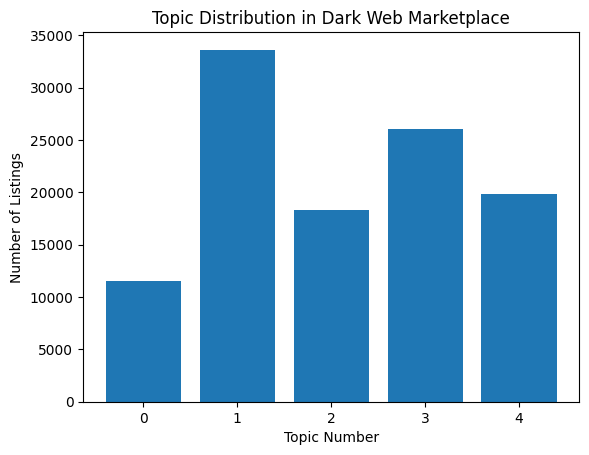

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# get topic probabilities
topic_probs = lda.transform(tfidf_matrix)

# dominant topic per document
dominant_topics = topic_probs.argmax(axis=1)

# count topics
topic_counts = np.bincount(dominant_topics)

# plot
plt.figure()
plt.bar(range(len(topic_counts)), topic_counts)
plt.xlabel("Topic Number")
plt.ylabel("Number of Listings")
plt.title("Topic Distribution in Dark Web Marketplace")
plt.show()


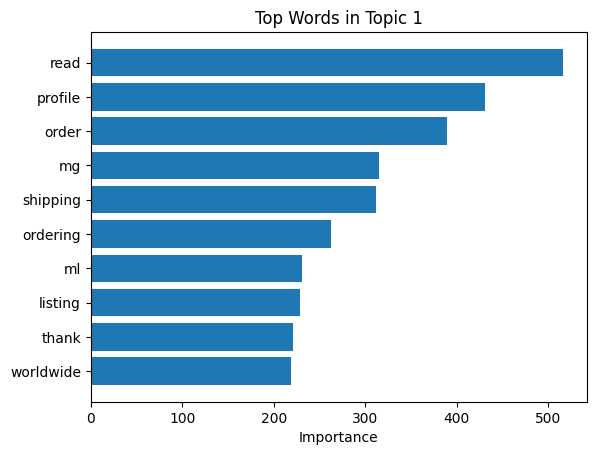

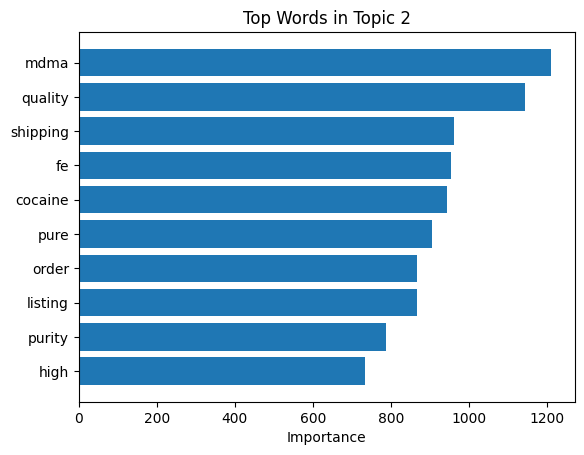

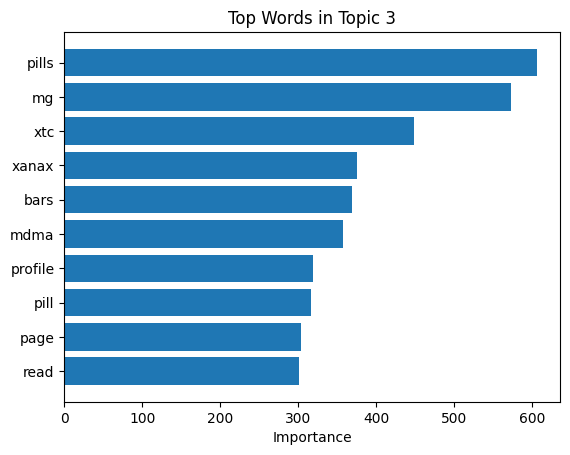

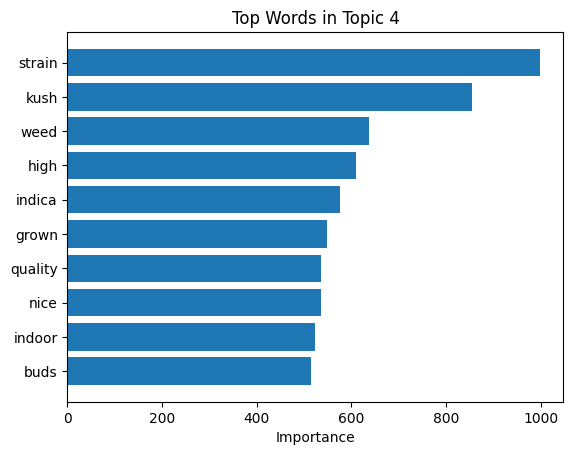

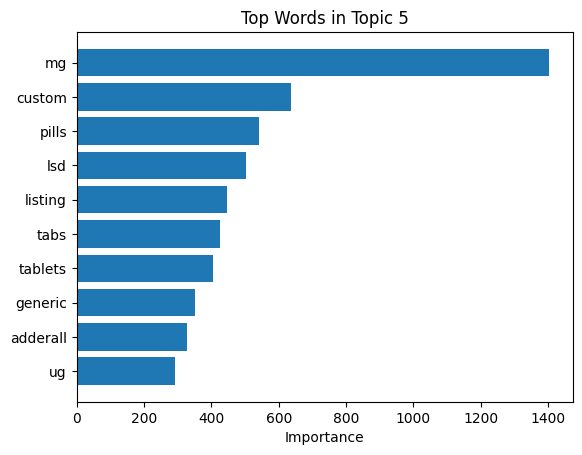

In [32]:
feature_names = tfidf.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_words = topic.argsort()[-10:]
    words = [feature_names[i] for i in top_words]
    weights = topic[top_words]

    plt.figure()
    plt.barh(words, weights)
    plt.title(f"Top Words in Topic {topic_idx + 1}")
    plt.xlabel("Importance")
    plt.show()


In [34]:
pip install wordcloud

  Using cached wordcloud-1.9.5-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.5-cp311-cp311-win_amd64.whl (306 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


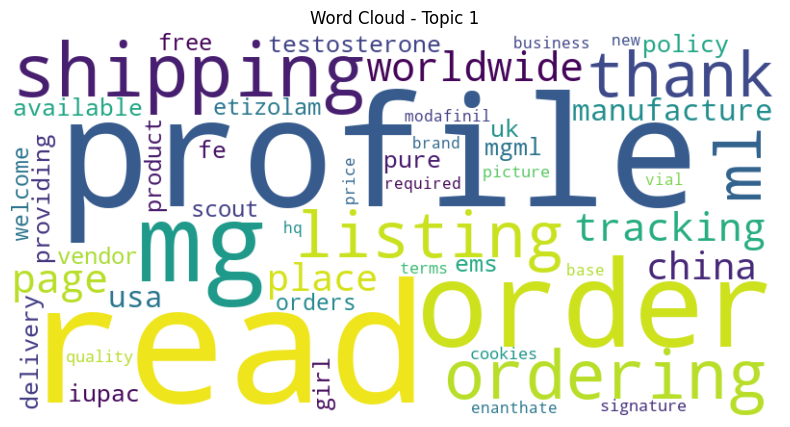

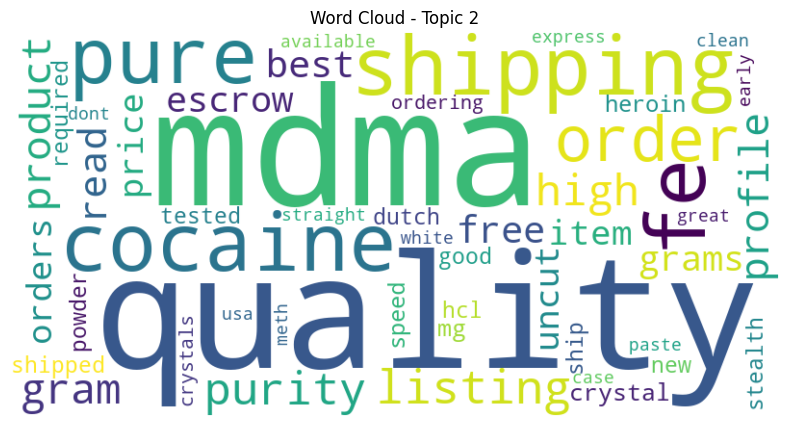

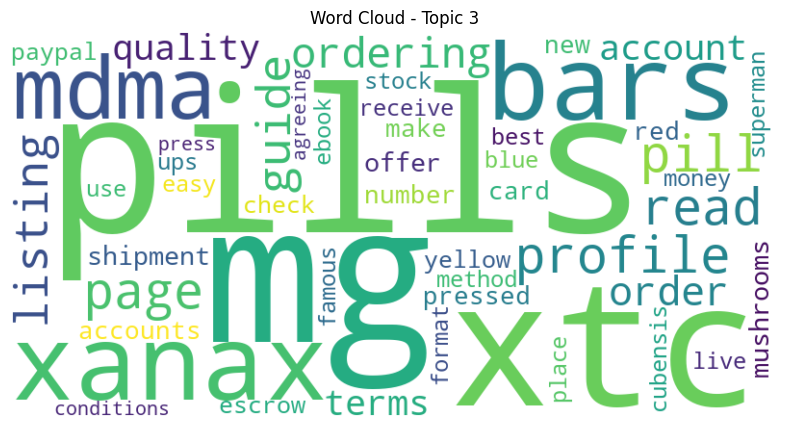

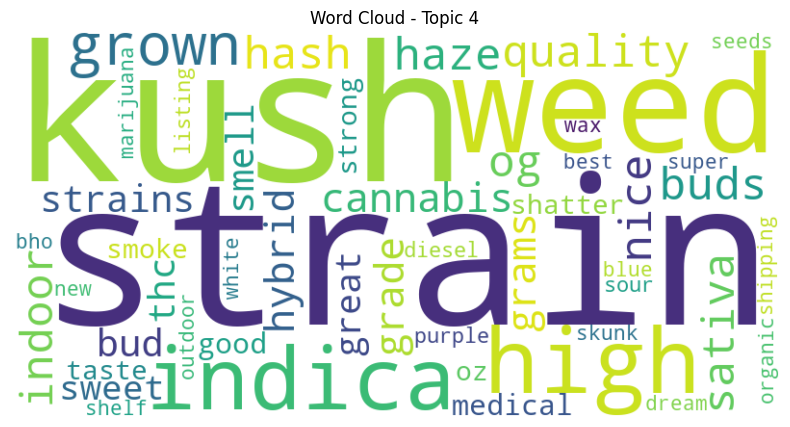

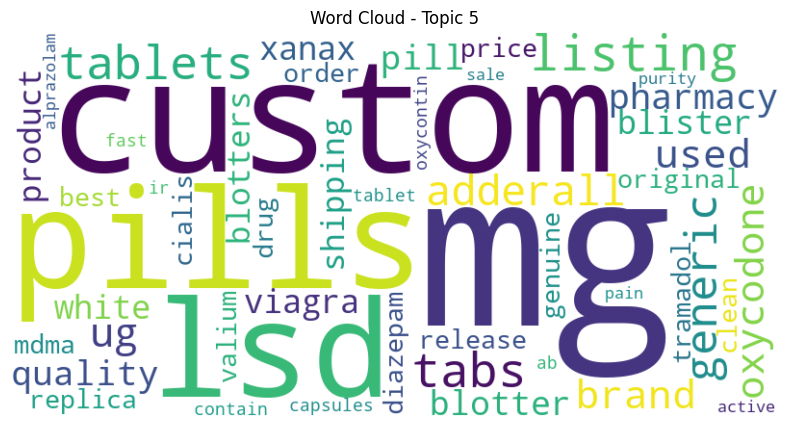

In [35]:
from wordcloud import WordCloud

for topic_idx, topic in enumerate(lda.components_):
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white"
    )

    topic_words = {
        feature_names[i]: topic[i]
        for i in topic.argsort()[-50:]
    }

    wc.generate_from_frequencies(topic_words)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Topic {topic_idx + 1}")
    plt.show()
